In [1]:
pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
os.environ['TRANSFORMERS_NO_ADVISORY_WARNINGS'] = 'true'
os.environ['TOKENIZERS_PARALLELISM'] = 'false'

import warnings
warnings.filterwarnings("ignore")


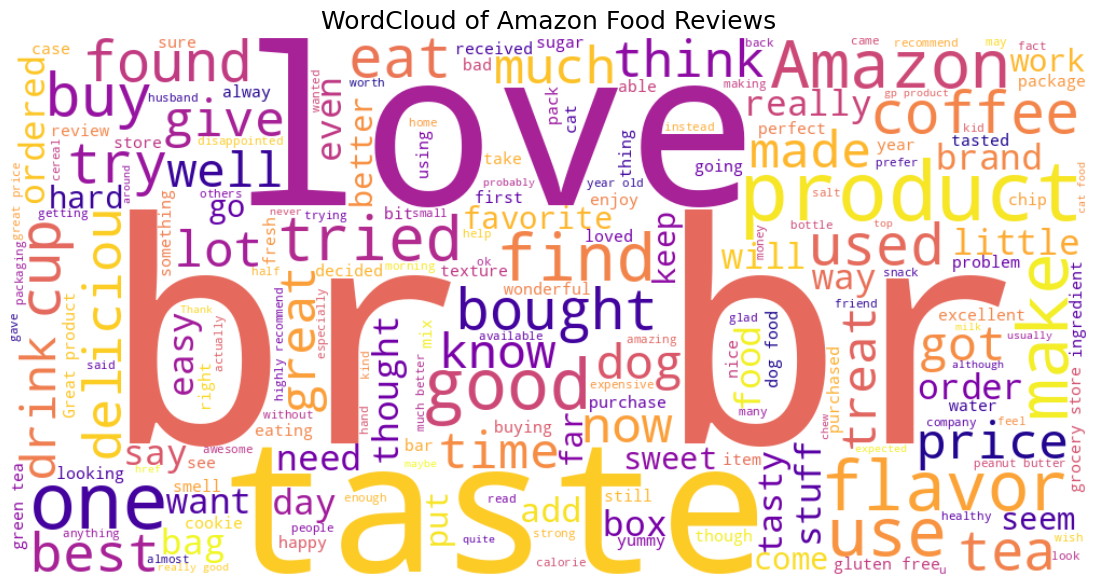

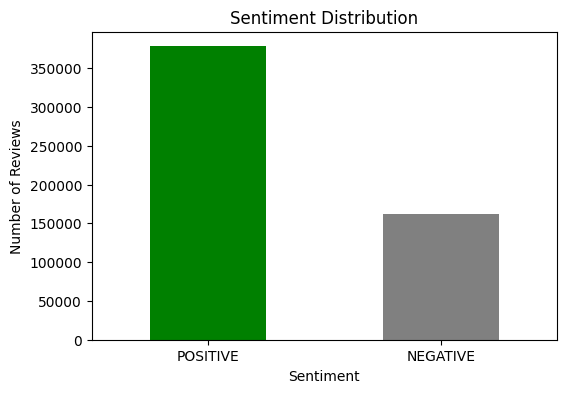

In [3]:
# ================================================================
# Step 1: Imports
# ================================================================

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ================================================================
# Step 2: Load Real Amazon Food Review Dataset
# ================================================================

# ✅ Adjust the file path if needed
# If your reviews are already in a CSV
df = pd.read_csv("/home/mukhopadhyayd/Customer Sentiment/data/processed/reviews_with_sentiment.csv")

# If your dataset has 'full_review' column (based on your structure)
reviews = df['full_review'].dropna().astype(str).tolist()

# ================================================================
# Step 3: Generate WordCloud from Real Reviews
# ================================================================

# Join all reviews into one big text
text = " ".join(reviews)

# Create WordCloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='plasma',
    max_words=200
).generate(text)

# Plot WordCloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Amazon Food Reviews", fontsize=18)
plt.show()

# ================================================================
# Step 4: Sentiment Chart (Optional if your dataset has 'bert_sentiment')
# ================================================================

if 'bert_sentiment' in df.columns:
    sentiment_counts = df['bert_sentiment'].value_counts()

    plt.figure(figsize=(6,4))
    sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
    plt.title("Sentiment Distribution")
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Reviews")
    plt.xticks(rotation=0)
    plt.show()
else:
    print("Sentiment column not found. Skipping sentiment bar plot.")
